In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
# Inspect the data
print(df.head())
print(df.info())
print(df.describe())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [4]:
# Handle missing values
df = df.dropna()

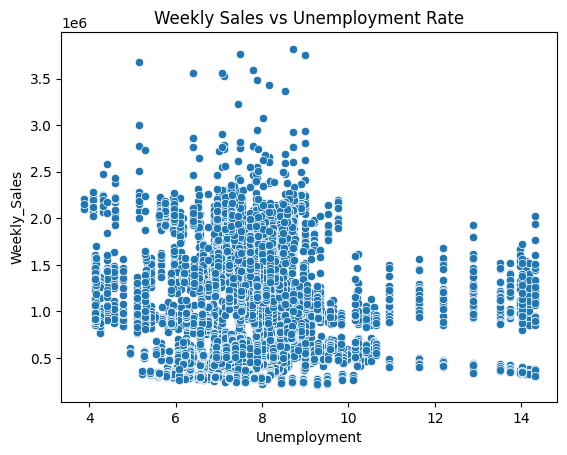

In [5]:
# EDA
# Weekly Sales vs Unemployment Rate
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales vs Unemployment Rate')
plt.show()

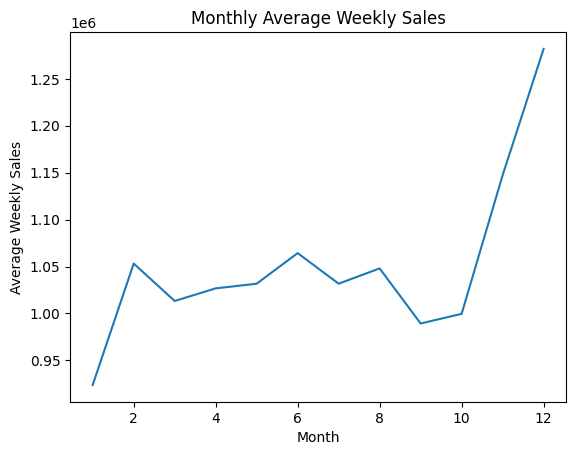

In [7]:
# Seasonal Trend in Weekly Sales
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='line')
plt.title('Monthly Average Weekly Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

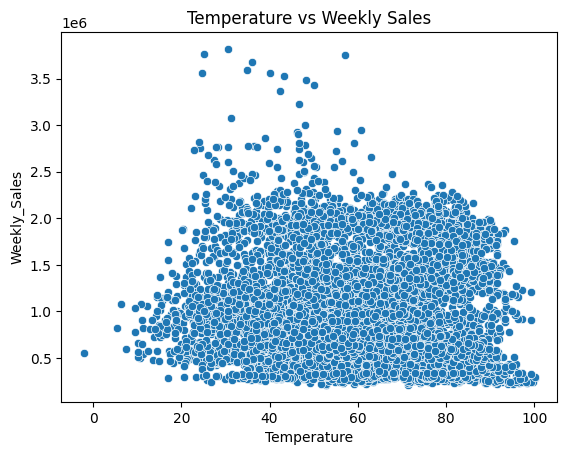

In [8]:
# Temperature vs Weekly Sales
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Temperature vs Weekly Sales')
plt.show()

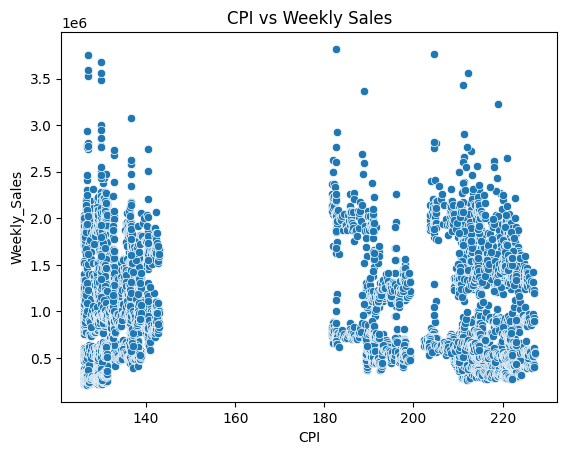

In [9]:
# CPI vs Weekly Sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('CPI vs Weekly Sales')
plt.show()

In [10]:
# Top and Worst Performing Stores
store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
top_performing_store = store_sales.loc[store_sales['Weekly_Sales'].idxmax()]
worst_performing_store = store_sales.loc[store_sales['Weekly_Sales'].idxmin()]
print("Top Performing Store:", top_performing_store)
print("Worst Performing Store:", worst_performing_store)

Top Performing Store: Store           2.000000e+01
Weekly_Sales    3.013978e+08
Name: 19, dtype: float64
Worst Performing Store: Store                 33.00
Weekly_Sales    37160221.96
Name: 32, dtype: float64


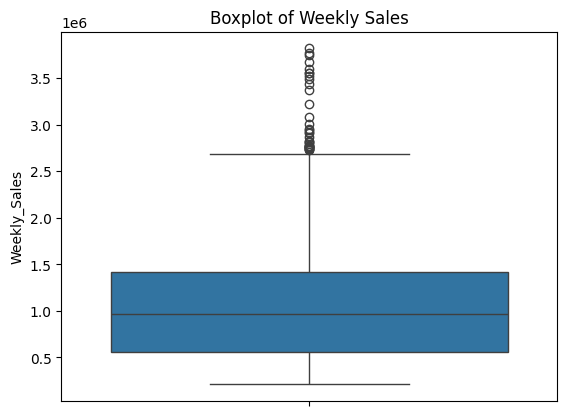

In [11]:
# Outlier Analysis
sns.boxplot(df['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales')
plt.show()

In [12]:
# Handle outliers (example: capping)
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Weekly_Sales'] = np.where(df['Weekly_Sales'] < lower_bound, lower_bound, df['Weekly_Sales'])
df['Weekly_Sales'] = np.where(df['Weekly_Sales'] > upper_bound, upper_bound, df['Weekly_Sales'])

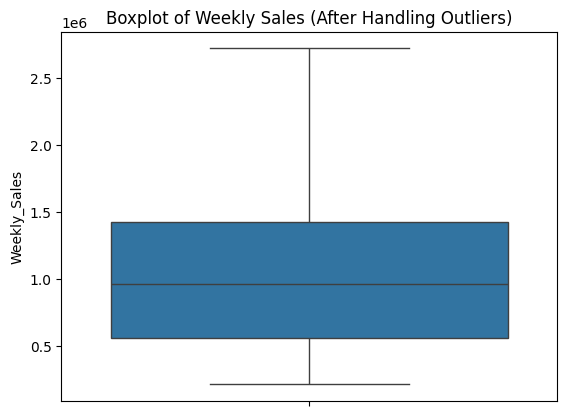

In [13]:

# Check the updated boxplot
sns.boxplot(df['Weekly_Sales'])
plt.title('Boxplot of Weekly Sales (After Handling Outliers)')
plt.show()

**Predictive Modelling**

In [14]:
# Prepare data for modeling
features = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']
X = df[features]
y = df['Weekly_Sales']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 431034.05586341507
Mean Squared Error: 265230761249.98834
Root Mean Squared Error: 515005.59341621556
R-squared: 0.15089768721618302


In [20]:
# Forecast sales for the next 12 weeks (dummy example)
forecast_features = X_test.head(12)  # Replace with actual future data
sales_forecast = model.predict(forecast_features)
print("Sales Forecast for the next 12 weeks:", sales_forecast)

Sales Forecast for the next 12 weeks: [1190483.57598484 1095356.61038638 1258468.4774388  1098504.38566175
  746905.73536935  925402.86481682  904538.56281093 1205806.07216174
 1011656.99339946 1206440.01899999 1213263.57245704 1175662.40006104]


In [22]:
forecast_features = X_test.head(12)  # Replace with actual future data
sales_forecast = model.predict(forecast_features)

# Create a date range for the next 12 weeks
future_dates = pd.date_range(start='05-02-2010', periods=12, freq='W')

In [23]:
# Create a DataFrame to hold the forecasted sales
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Sales': sales_forecast
})

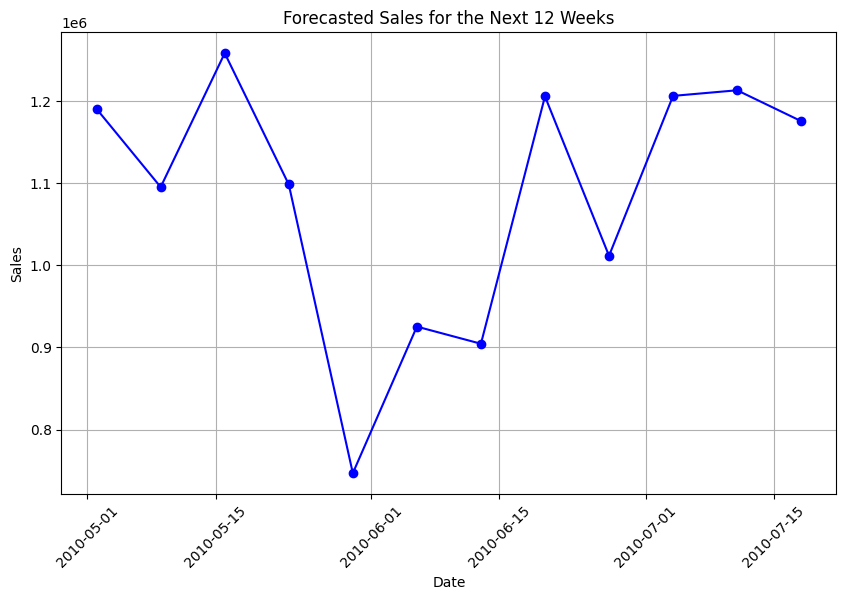

In [24]:
# Plot the forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], marker='o', linestyle='-', color='b')
plt.title('Forecasted Sales for the Next 12 Weeks')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [26]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MAE: 74118.29563154624
MSE: 17617504597.616154


In [28]:
# Time Series Forecasting with ARIMA

!pip install statsmodels

from statsmodels.tsa.arima.model import ARIMA
sales_ts = df.groupby('Date')['Weekly_Sales'].sum()
model = ARIMA(sales_ts, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


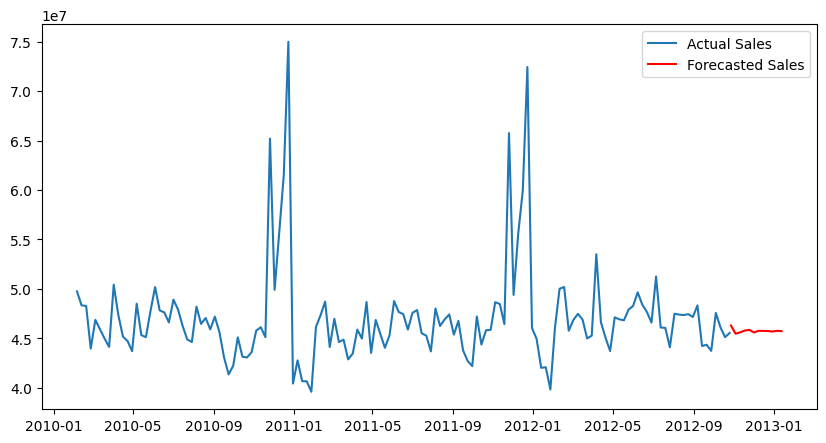

In [29]:
# Plot Forecast
plt.figure(figsize=(10, 5))
plt.plot(sales_ts, label='Actual Sales')
plt.plot(pd.date_range(sales_ts.index[-1], periods=12, freq='W'), forecast, label='Forecasted Sales', color='red')
plt.legend()
plt.show()